# Thevenin EC-Model
This model is build following the procedure presented by G. Plett in his course on Equivalent Circuit (EC) Models (http://mocha-java.uccs.edu/ECE5710/index.html)

### Load Profile 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import data_preprocessing as util

voltage_profile = util.load_voltage_raw_data('Profile 10A', 0, 1)
current_profile = util.load_current_raw_data('Profile 10A')
time = range(voltage_profile.shape[0])

fig,_ = plt.subplots(figsize=(6,6))
plt.subplot(2,1,1)  
plt.plot(voltage_profile, color='red', label='predicted')
plt.title('Voltage')
plt.legend()
plt.subplot(2,1,2)
plt.plot(current_profile, color='blue', label='predicted')
plt.title('Current')
plt.legend()
plt.show()

### Step 1: Instantaneuos Voltage Change to deduce $R_0$
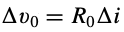

In [ ]:
# delta_v_0
volt_grad = np.gradient(voltage_profile) # to find instantaneuous change point
max_volt_change = np.argmax(volt_grad)
delta_v_0 = abs(voltage_profile[max_volt_change+3] - voltage_profile[max_volt_change-3])
print('delta_v_0:', round(delta_v_0, 5))

# delta_i
cur_grad = np.gradient(current_profile)
max_cur_change = np.argmax(cur_grad)
delta_i = abs(current_profile[max_cur_change+3] - current_profile[max_cur_change-7])
print('delta_i:', round(delta_i, 5))

# R_0
r_0 = delta_v_0 / delta_i
print('r_0:', round(r_0, 5))

### Step 2: Steady State Voltage Change to deduce $R_1$
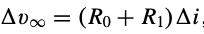

In [ ]:
# delta_v_infty
delta_v_infty = voltage_profile[-1]
print('delta_v_infty:', round(delta_v_infty, 5))

# R_1
r_1 = (delta_v_infty - r_0 * delta_i) / delta_i
print('r_1:', round(r_1, 5))

### Step 3: Time to decay to Steady State Voltage Change to deduce $C_1$
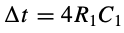

In [ ]:
# delta_t
curr_drop_profile = current_profile[2000:]

for i in range(len(curr_drop_profile)):
    if curr_drop_profile[i] < 9:
        t = i + 2000
        break
        
delta_t = len(current_profile) - t
delta_t = delta_t * 0.1
print('delta_t:', round(delta_t, 5))

# C_1
c_1 = delta_t / (4 * r_1)
print('c_1:', round(c_1, 5))